In [37]:
import numpy as np
import pandas as pd
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Database connection parameters
db_params = {
    'dbname': 'week1',
    'user': 'postgres',
    'password': 'habte',
    'host': 'localhost',
    'port': '5432'
}

# Create a SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}:{db_params["port"]}/{db_params["dbname"]}')

# SQL query to retrieve data
sql_query = "SELECT * FROM xdr_data;"

# Read data from PostgreSQL into a DataFrame
mydata = pd.read_sql_query(sql_query, engine)

In [3]:
# Drop rows with any missing values
mydata = mydata.dropna()

In [4]:
mydata['Start'] = pd.to_datetime(mydata['Start'], errors='coerce')
mydata['End'] = pd.to_datetime(mydata['End'], errors='coerce')

In [5]:
# Fill missing values in numeric columns with the mean
numeric_columns = mydata.select_dtypes(include='number').columns
mydata[numeric_columns] = mydata[numeric_columns].fillna(mydata[numeric_columns].mean())

In [21]:
mydata.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


/home/habte/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


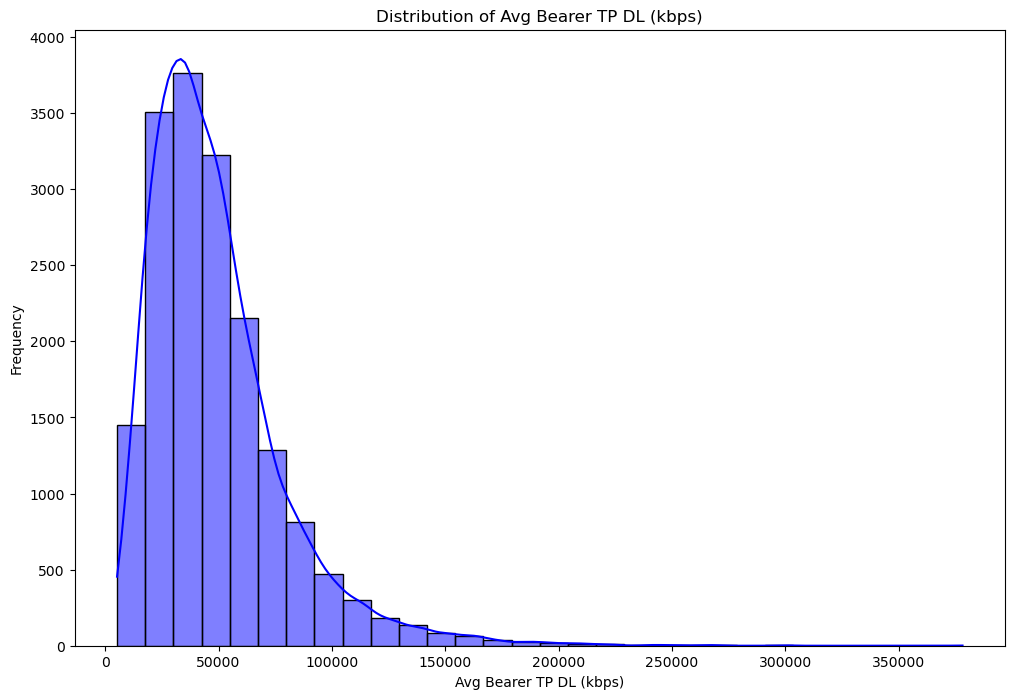

In [6]:
# Visualize distribution of key metrics
plt.figure(figsize=(12, 8))
sns.histplot(mydata['Avg Bearer TP DL (kbps)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Avg Bearer TP DL (kbps)')
plt.xlabel('Avg Bearer TP DL (kbps)')
plt.ylabel('Frequency')
plt.show()


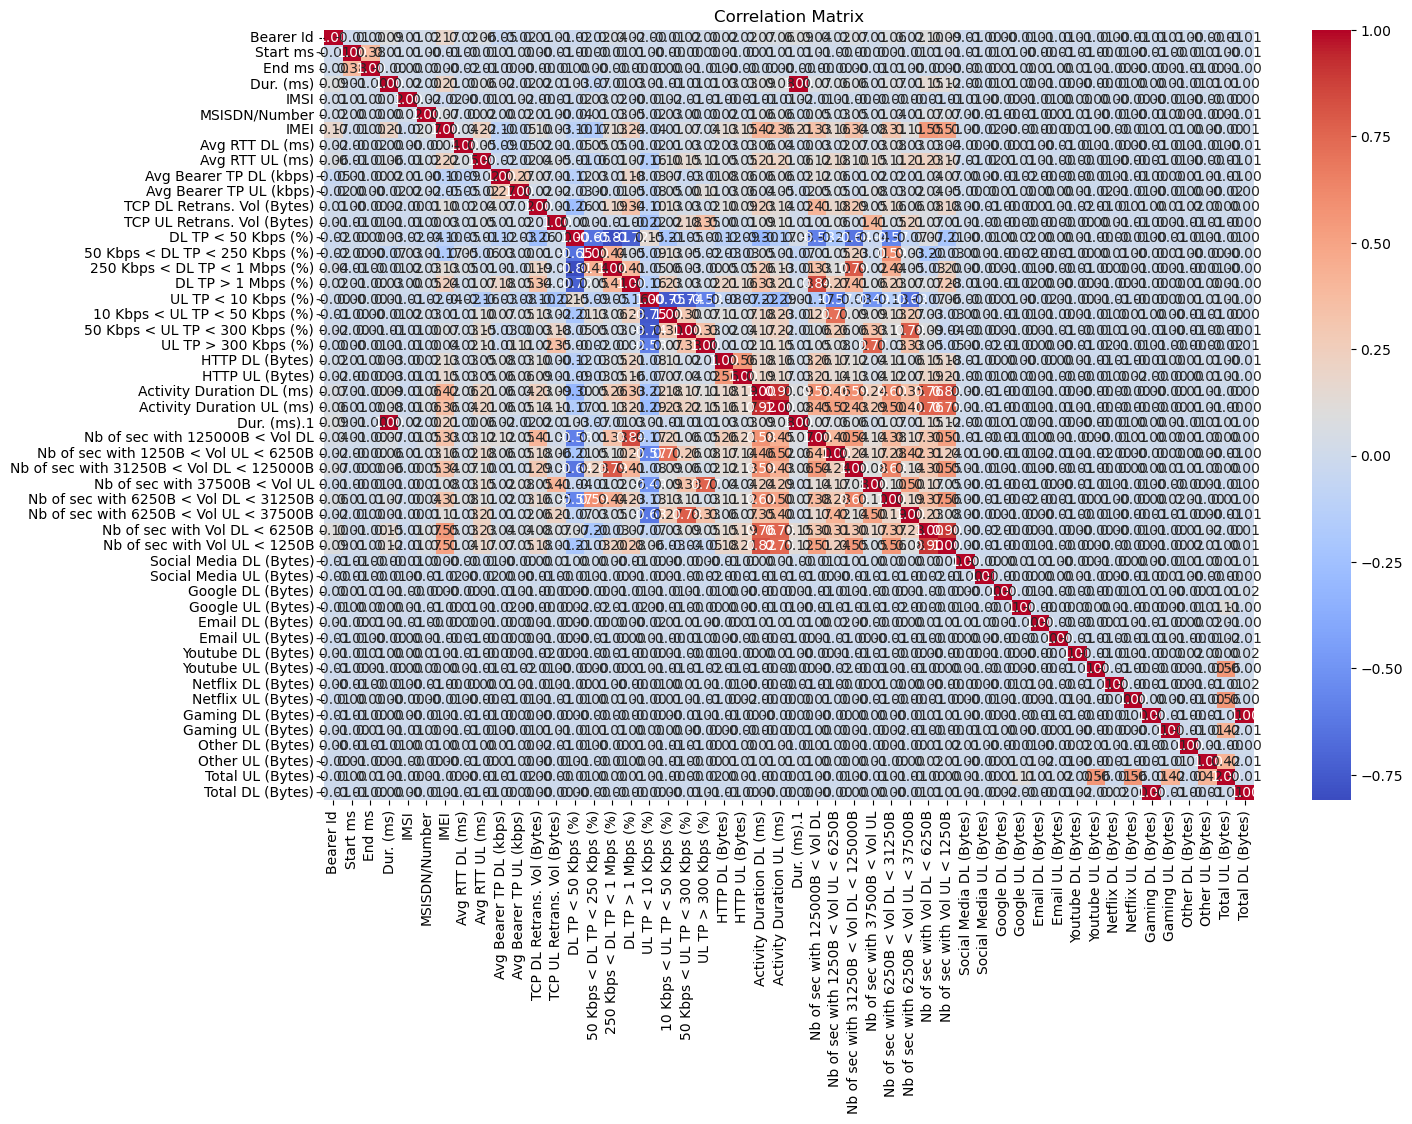

In [9]:
# Select only numeric columns for correlation analysis
numeric_columns = mydata.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = mydata[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

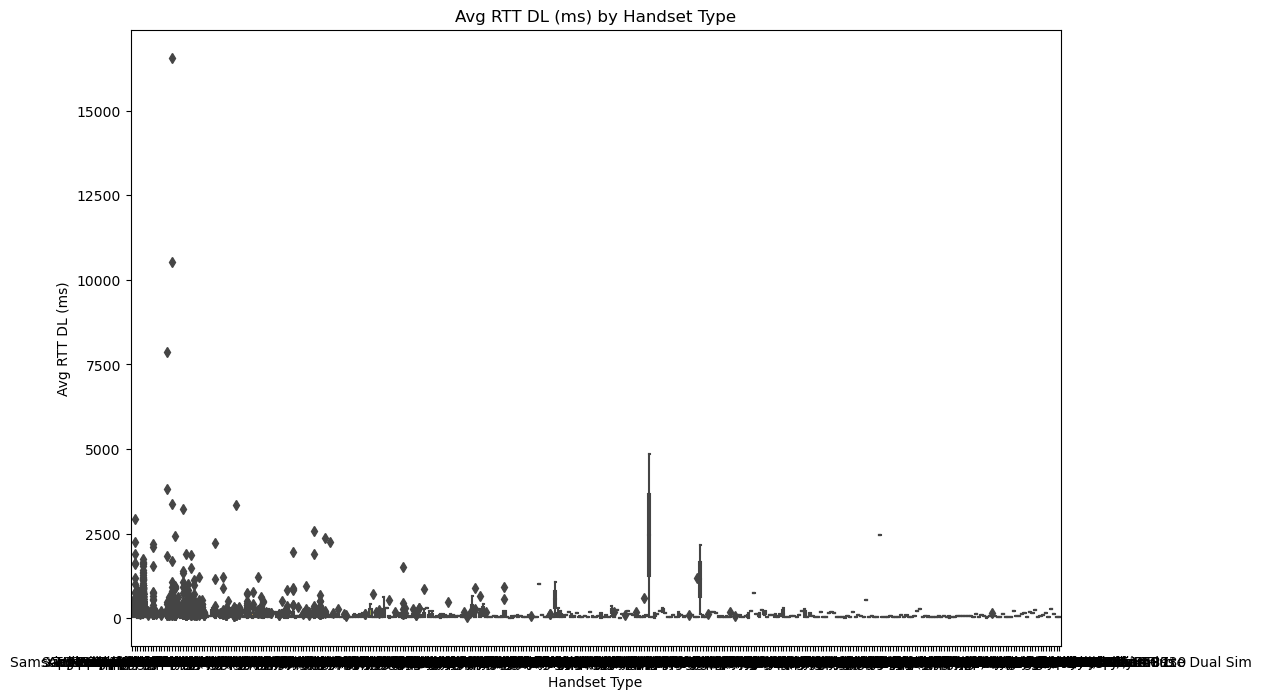

In [8]:

# Segment data by user type and visualize satisfaction metrics
plt.figure(figsize=(12, 8))
sns.boxplot(x='Handset Type', y='Avg RTT DL (ms)', data=mydata)
plt.title('Avg RTT DL (ms) by Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Avg RTT DL (ms)')
plt.show()

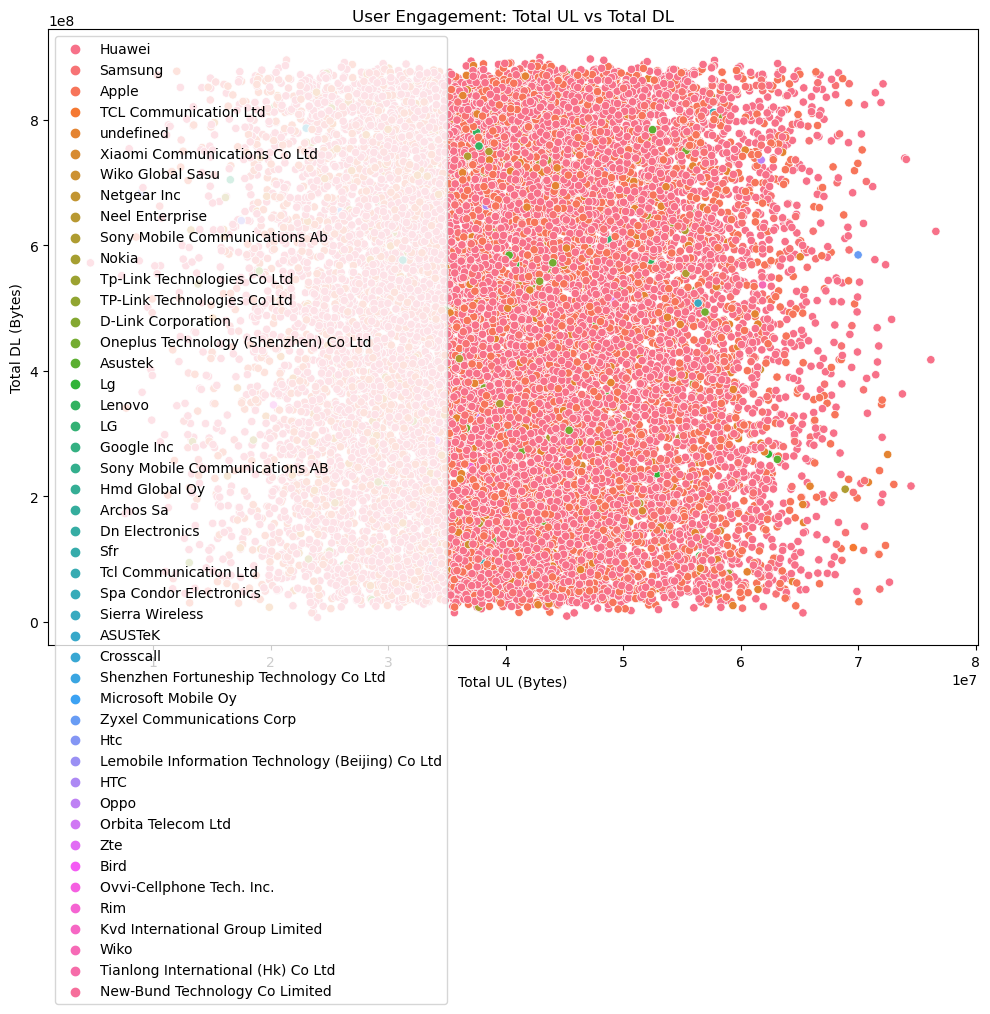

In [10]:
# Analyze user engagement metrics
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total UL (Bytes)', y='Total DL (Bytes)', data=mydata, hue='Handset Manufacturer')
plt.title('User Engagement: Total UL vs Total DL')
plt.xlabel('Total UL (Bytes)')
plt.ylabel('Total DL (Bytes)')
plt.legend()
plt.show()


In [35]:
# Select features and target variable
features = mydata[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)']]
target = mydata['cluster']  
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.07070874676638444
R-squared: 0.6458480070283181
